In [1]:
import numpy as np
from scipy.spatial import distance  as spd
from matplotlib import pyplot as plt
import pickle

In [2]:
fName = 'LAB2distancias001.p'
D = pickle.load(open(fName, 'rb'))

In [3]:
type(D) # ver o que está no ficheiro
D.keys() 

X = D['X']
y = D['idxClass']

print(X.shape) # ver como estao arrumadas as coisas
print(y.shape)

(2, 2000)
(2000,)


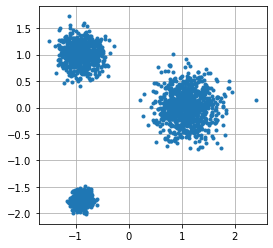

In [4]:
plt.plot(X[0,:], X[1,:],'.') #Ver os dados, raw
plt.axis('scaled')
plt.grid(True)

[1. 2. 3.]


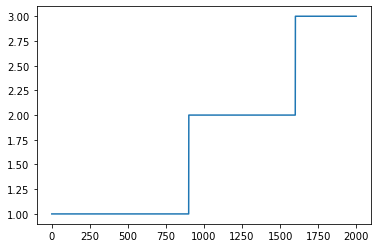

In [5]:
print(np.unique(y)) # descobrir que classes temos
plt.plot(y) # ver a distribuicao das classes

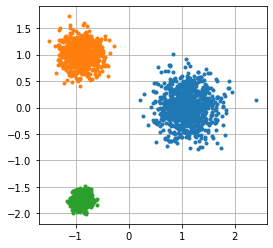

In [6]:
#fazer plot do grafico em cima com cores representando os grupos
plt.plot(X[0, y==1], X[1, y==1],'.')
plt.plot(X[0, y==2], X[1, y==2],'.')
plt.plot(X[0, y==3], X[1, y==3],'.')
plt.axis('scaled')
plt.grid(True)

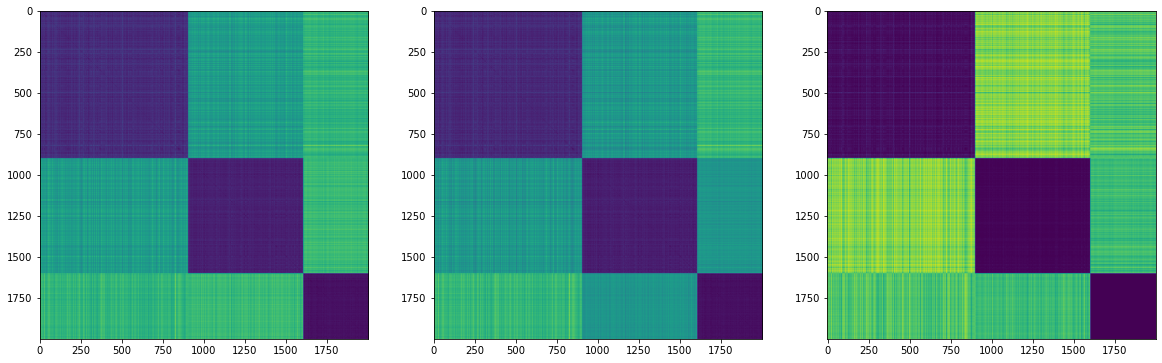

In [11]:
#calcular matriz de distancia
D1 = spd.squareform(spd.pdist(X.T, 'cityBlock')) # usar a transposta porque os dados estao invertidos, ter cuidado se aparecer só 1 valor
D2 = spd.squareform(spd.pdist(X.T, 'euclidean')) # squareform transforma a lista recebida, expandido a quantidade de valores incluindo a diagonal a zeros
Dc = spd.squareform(spd.pdist(X.T, 'cosine'))

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(D2)
plt.subplot(132)
plt.imshow(D1)
plt.subplot(133)
plt.imshow(Dc)


(-0.5, 1999.5, 1999.5, -0.5)

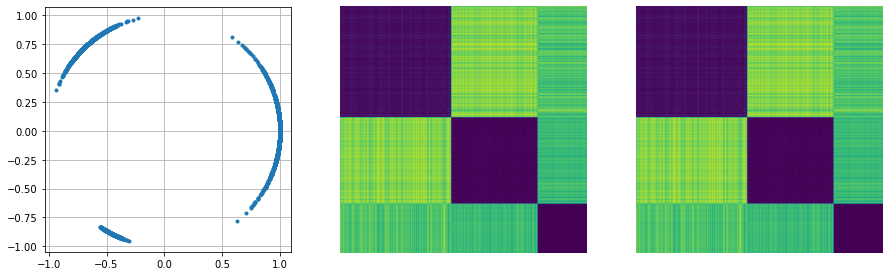

In [14]:
#Calcular a matriz de distancia do coseno

nx = np.sqrt(np.sum(X**2, axis=0)) #normalizar e projetar os dados num circulo
Xn = X/nx 

plt.figure(figsize = (15,5))

plt.subplot(131)
plt.plot(Xn[0,:], Xn[1,:],'.')
plt.axis('scaled')
plt.grid(True)

Dc2 = 1- np.dot(Xn.T, Xn)

plt.subplot(132)
plt.imshow(Dc)
plt.axis('off')
plt.subplot(133)
plt.imshow(Dc2)
plt.axis('off')

In [17]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure.
    
    Parameters
    ----------
    num : int or str, optional, default: None
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        *num*.
    
    figsize : (float, float), optional, default: None
        width, height in inches. If not provided, defaults to
        :rc:`figure.figsize` = ``[6.4, 4.8]``.
    
    dpi : integer, optional, default: None
        re